<a href="https://colab.research.google.com/github/NasimShokrgozar/FirstSc/blob/main/Session09_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df_t=pd.read_excel('/content/Telco - classification or clustering.xls')
df_t.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,2,13,44,1,9,64,4,5,0,0,...,0,0,1.308333,NaN,NaN,2.014903,NaN,4.158883,1,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,4,1
2,3,68,52,1,24,116,1,29,0,1,...,1,0,2.898671,2.890372,NaN,3.409496,NaN,4.753590,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,2.246015,NaN,NaN,NaN,NaN,3.496508,1,1
4,2,23,30,1,9,30,1,2,0,0,...,1,0,1.840550,NaN,NaN,NaN,NaN,3.401197,3,0


In [4]:
df_t=df_t.fillna(0)

In [5]:
X=df_t.drop('churn',axis=1)
Y=df_t['churn']

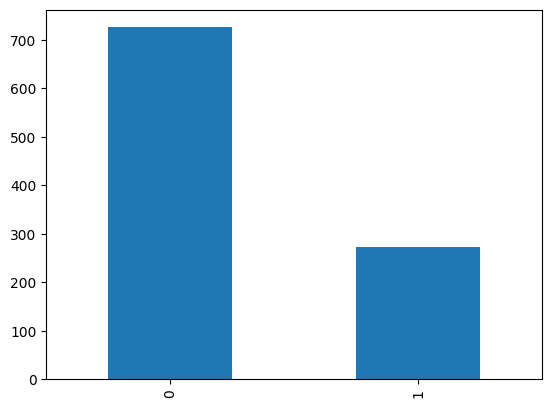

In [6]:
Y.value_counts().plot.bar()
plt.show()

In [7]:
Y.value_counts()

0    726
1    274
Name: churn, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
MMS.fit(X)
Xnormal=MMS.transform(X)
#Xnomal=MMS.fit_transform(X)
Xnormal=pd.DataFrame(Xnormal , columns=X.columns)# برای اینکه اسم سر ستون ها به حالت خود باقی بماند و به عدد تبدیل نشود این دستور کالمن را می نویسیم.
Xnormal.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,forward,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat
0,0.5,0.169014,0.440678,1.0,0.163636,0.033153,0.75,0.106383,0.0,0.0,...,1.0,0.0,0.0,0.300145,0.000000,0.0,0.429284,0.00000,0.375641,0.000000
1,1.0,0.140845,0.254237,1.0,0.127273,0.076552,1.00,0.106383,0.0,0.0,...,1.0,1.0,0.0,0.336933,0.588468,0.0,0.580483,0.75776,0.519983,1.000000
2,1.0,0.943662,0.576271,1.0,0.436364,0.064497,0.00,0.617021,0.0,1.0,...,0.0,1.0,0.0,0.637794,0.560879,0.0,0.726408,0.00000,0.489523,0.666667
3,0.5,0.450704,0.254237,0.0,0.218182,0.014467,0.25,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.499227,0.000000,0.0,0.000000,0.00000,0.248802,0.000000
4,0.5,0.309859,0.203390,1.0,0.163636,0.012658,0.00,0.042553,0.0,0.0,...,1.0,1.0,0.0,0.413142,0.000000,0.0,0.000000,0.00000,0.230551,0.666667


In [10]:
#ارزیابی مدا با روش Holdout
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Xnormal,Y,test_size=0.25 ,random_state=2020)

In [11]:
Ytest.value_counts()

0    174
1     76
Name: churn, dtype: int64

In [12]:
# اگوریتم naive_bayes
from sklearn.naive_bayes import GaussianNB ,MultinomialNB #1
GNB=GaussianNB()#2
GNB.fit(Xtrain,Ytrain) #3
pred=GNB.predict(Xtest) #4
pred


array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1])

In [13]:
# حال باید مدل بالا را ارزیابی کنیم
from sklearn.metrics import confusion_matrix,accuracy_score , recall_score , precision_score , f1_score , classification_report
print(confusion_matrix(Ytest,pred))
print(accuracy_score(Ytest,pred))
print(recall_score(Ytest,pred))
print(precision_score(Ytest,pred))
print(f1_score(Ytest,pred))
print(classification_report(Ytest,pred))

[[103  71]
 [ 17  59]]
0.648
0.7763157894736842
0.45384615384615384
0.5728155339805825
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       174
           1       0.45      0.78      0.57        76

    accuracy                           0.65       250
   macro avg       0.66      0.68      0.64       250
weighted avg       0.74      0.65      0.66       250



In [14]:
# در ایجا مشخص کردیم در چه کلاسی recall
# اگر پیش بینی ما بک تکست بود باید در پوز لیبل صراحتا همان تکست را بنویسیم.
print(confusion_matrix(Ytest,pred))
print(accuracy_score(Ytest,pred))
print(recall_score(Ytest,pred , pos_label=0))
print(precision_score(Ytest,pred, pos_label=0))
print(f1_score(Ytest,pred,average='macro'))
print(classification_report(Ytest,pred))

[[103  71]
 [ 17  59]]
0.648
0.5919540229885057
0.8583333333333333
0.636747903044713
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       174
           1       0.45      0.78      0.57        76

    accuracy                           0.65       250
   macro avg       0.66      0.68      0.64       250
weighted avg       0.74      0.65      0.66       250



In [15]:
# تمرین- همین کار را برای روش دوم استفاده کنید
from sklearn.naive_bayes import GaussianNB ,MultinomialNB #1
MNB=MultinomialNB ()#2
MNB.fit(Xtrain,Ytrain) #3
pred=MNB.predict(Xtest) #4
pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1])

In [16]:
print(confusion_matrix(Ytest,pred))
print(accuracy_score(Ytest,pred))
print(recall_score(Ytest,pred , pos_label=0))
print(precision_score(Ytest,pred, pos_label=0))
print(f1_score(Ytest,pred,average='macro'))
print(classification_report(Ytest,pred))

[[127  47]
 [ 36  40]]
0.668
0.7298850574712644
0.7791411042944786
0.6222533724126632
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       174
           1       0.46      0.53      0.49        76

    accuracy                           0.67       250
   macro avg       0.62      0.63      0.62       250
weighted avg       0.68      0.67      0.67       250



In [18]:
# KNN
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor
KNN=KNeighborsClassifier(n_neighbors=3 ,weights='distance',n_jobs=3) #1
KNN.fit(Xtrain,Ytrain) #3
pred=MNB.predict(Xtest) #4


print(confusion_matrix(Ytest,pred))
print(accuracy_score(Ytest,pred))
print(recall_score(Ytest,pred , pos_label=0))
print(precision_score(Ytest,pred, pos_label=0))
print(f1_score(Ytest,pred,average='macro'))
print(classification_report(Ytest,pred))

[[127  47]
 [ 36  40]]
0.668
0.7298850574712644
0.7791411042944786
0.6222533724126632
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       174
           1       0.46      0.53      0.49        76

    accuracy                           0.67       250
   macro avg       0.62      0.63      0.62       250
weighted avg       0.68      0.67      0.67       250



In [19]:
# Tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=2020 , criterion='entropy',max_depth=3, min_samples_split=4 , min_samples_leaf=2 ,class_weight='balanced') #1
#criterion='entropy' ,'gini'  
#class_weight='balanced'  ,None ,{0:0.3 , 1:0.7}
DT.fit(Xtrain,Ytrain) #3
pred=DT.predict(Xtest) #4


print(confusion_matrix(Ytest,pred))
print(accuracy_score(Ytest,pred))
print(recall_score(Ytest,pred , pos_label=0))
print(precision_score(Ytest,pred, pos_label=0))
print(f1_score(Ytest,pred,average='macro'))
print(classification_report(Ytest,pred))

[[110  64]
 [ 24  52]]
0.648
0.632183908045977
0.8208955223880597
0.6279761904761905
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       174
           1       0.45      0.68      0.54        76

    accuracy                           0.65       250
   macro avg       0.63      0.66      0.63       250
weighted avg       0.71      0.65      0.66       250



In [ ]:
# احتمال هر یک از کلاس ها
r=DT.predict_proba (Xtest)
r

In [24]:
# فقط درصد کلاس یک
r=r[:,1]

In [27]:
res=pd.DataFrame({'real':Ytest.values,'pred':r})
res.head()

,real,pred
0,1,0.830387
1,1,0.830387
2,0,0.255972
3,1,0.654192
4,1,0.255972


In [28]:
# برای پیش بینی کل مدل
from sklearn.model_selection import cross_val_predict ,cross_val_score
pred =cross_val_predict(GNB ,X ,Y ,cv=5)


print(confusion_matrix(Y,pred))
print(accuracy_score(Y,pred))
print(recall_score(Y,pred ))
print(precision_score(Y,pred))
print(f1_score(Y,pred,average='macro'))
print(classification_report(Y,pred))

[[407 319]
 [ 50 224]]
0.631
0.8175182481751825
0.4125230202578269
0.6182143814193527
              precision    recall  f1-score   support

           0       0.89      0.56      0.69       726
           1       0.41      0.82      0.55       274

    accuracy                           0.63      1000
   macro avg       0.65      0.69      0.62      1000
weighted avg       0.76      0.63      0.65      1000



In [29]:
from sklearn.model_selection import cross_val_predict ,cross_val_score
pred =cross_val_predict(KNN ,X ,Y ,cv=5)


print(confusion_matrix(Y,pred))
print(accuracy_score(Y,pred))
print(recall_score(Y,pred ))
print(precision_score(Y,pred))
print(f1_score(Y,pred,average='macro'))
print(classification_report(Y,pred))

[[588 138]
 [172 102]]
0.69
0.3722627737226277
0.425
0.5941367157019339
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       726
           1       0.42      0.37      0.40       274

    accuracy                           0.69      1000
   macro avg       0.60      0.59      0.59      1000
weighted avg       0.68      0.69      0.68      1000



In [30]:
from sklearn.model_selection import cross_val_predict ,cross_val_score
pred =cross_val_predict(DT ,X ,Y ,cv=5)


print(confusion_matrix(Y,pred))
print(accuracy_score(Y,pred))
print(recall_score(Y,pred ))
print(precision_score(Y,pred))
print(f1_score(Y,pred,average='macro'))
print(classification_report(Y,pred))

[[509 217]
 [ 99 175]]
0.684
0.6386861313868614
0.44642857142857145
0.644321983152568
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       726
           1       0.45      0.64      0.53       274

    accuracy                           0.68      1000
   macro avg       0.64      0.67      0.64      1000
weighted avg       0.73      0.68      0.70      1000



In [36]:
from sklearn.model_selection import cross_val_predict ,cross_val_score
score =cross_val_score(GNB ,X ,Y ,cv=5,scoring='accuracy')
#scoring='f1' ,  'accuracy'
print(score)
print(score.mean())
print(score.std())

[0.59  0.67  0.63  0.63  0.635]
0.631
0.025377155080899064


In [34]:
from sklearn.model_selection import cross_val_predict ,cross_val_score
score =cross_val_score(KNN ,X ,Y ,cv=5,scoring='accuracy')
#scoring='f1' ,  'accuracy'
print(score)
print(score.mean())
print(score.std())

[0.65  0.69  0.705 0.675 0.73 ]
0.69
0.027018512172212572


In [35]:
from sklearn.model_selection import cross_val_predict ,cross_val_score
score =cross_val_score(DT,X ,Y ,cv=5,scoring='accuracy')
#scoring='f1' ,  'accuracy'
print(score)
print(score.mean())
print(score.std())

[0.635 0.615 0.67  0.75  0.75 ]
0.6839999999999999
0.05669215113223346
